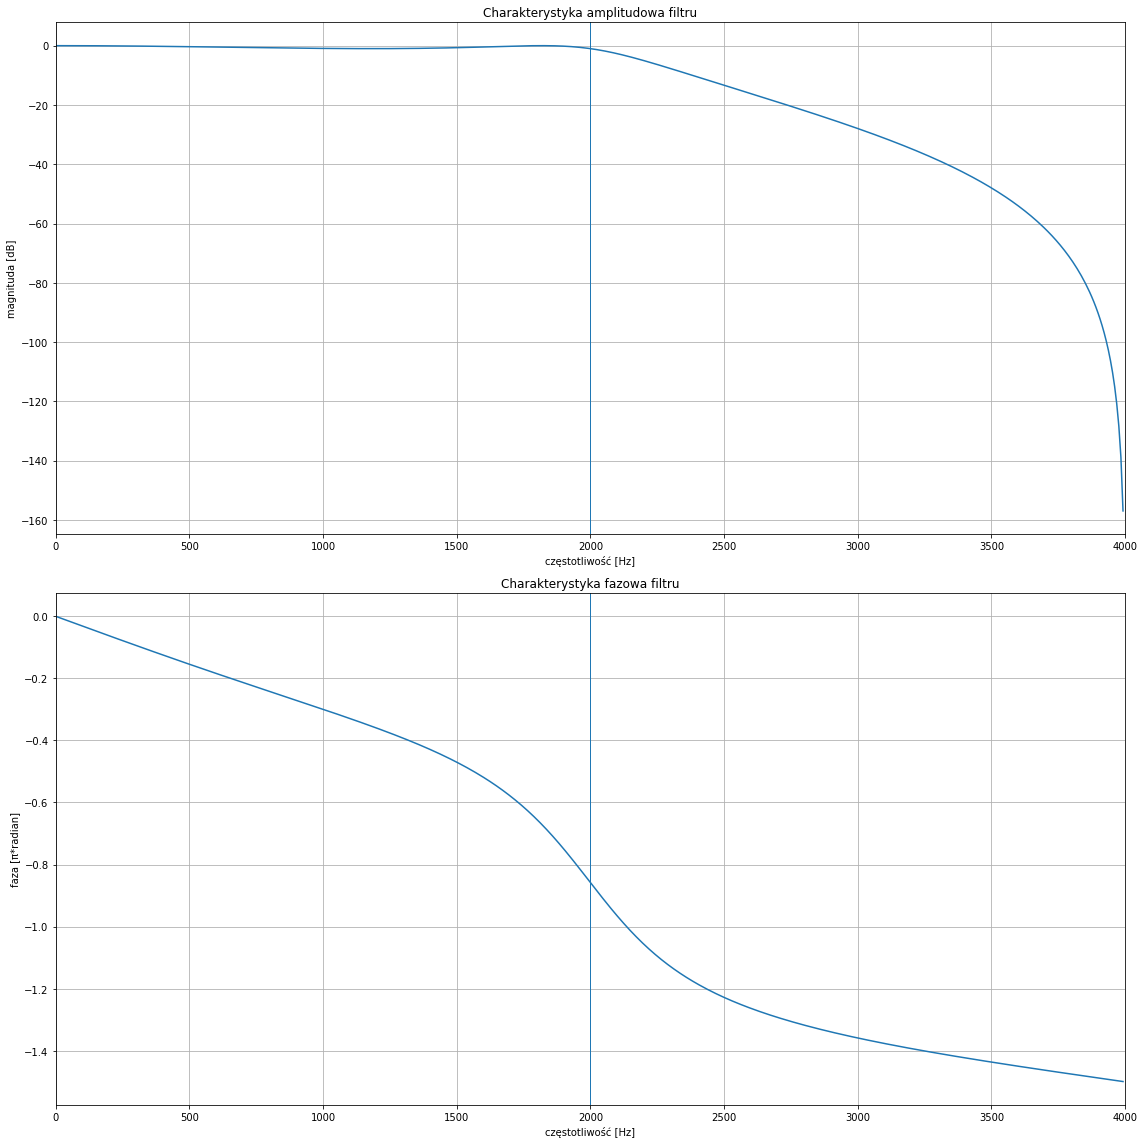

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import IPython.display as ipd
from scipy.io import wavfile

fg = 2000
fs = 8000 
rzad = 3
fale = 1 

czestotliwosc_Nyquista = fs/2
czestotliwosc_normalna = fg / czestotliwosc_Nyquista 

b, a = scipy.signal.cheby1(rzad, fale, czestotliwosc_normalna, btype = 'lowpass', analog = False)
w, H = scipy.signal.freqz(b, a)
f = w * czestotliwosc_Nyquista / np.pi

#6.4
#a)
liczba_pikseli = 100

figura, wykresy = plt.subplots(2)
figura.set_size_inches(16, 16)
figura.set_figure(liczba_pikseli)

wykres = wykresy[0]
wykres.set_xlim(0, czestotliwosc_Nyquista)
wykres.plot(f, 20 * np.log10(np.abs(H)))
wykres.grid()

wykres = wykresy[1]
wykres.set_xlim(0, czestotliwosc_Nyquista)
wykres.plot(f, np.unwrap(np.angle(H)) / np.pi)
wykres.grid()

wykresy[0].axvline(fg, linewidth = 1)
wykresy[1].axvline(fg, linewidth = 1)

wykres = wykresy[0]
wykres.set_xlabel('częstotliwość [Hz]')
wykres.set_ylabel('magnituda [dB]')
wykres.set_title('Charakterystyka amplitudowa filtru')

wykres = wykresy[1]
wykres.set_xlabel('częstotliwość [Hz]')
wykres.set_ylabel('faza [π*radian]')
wykres.set_title('Charakterystyka fazowa filtru')

figura.set_tight_layout(tight = True)



In [ ]:
#6.4
#b)
fs_mowy, mowa = wavfile.read('My Voice 8kHz.wav')
dlugosc = len(mowa) / fs_mowy
t = np.linspace(0, dlugosc, len(mowa), endpoint = False)
mowa_filtrowana = scipy.signal.lfilter(b, a, mowa)


ipd.Audio(mowa, rate = fs_mowy)

In [ ]:
#6.4
#b)
ipd.Audio(mowa_filtrowana, rate = fs_mowy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


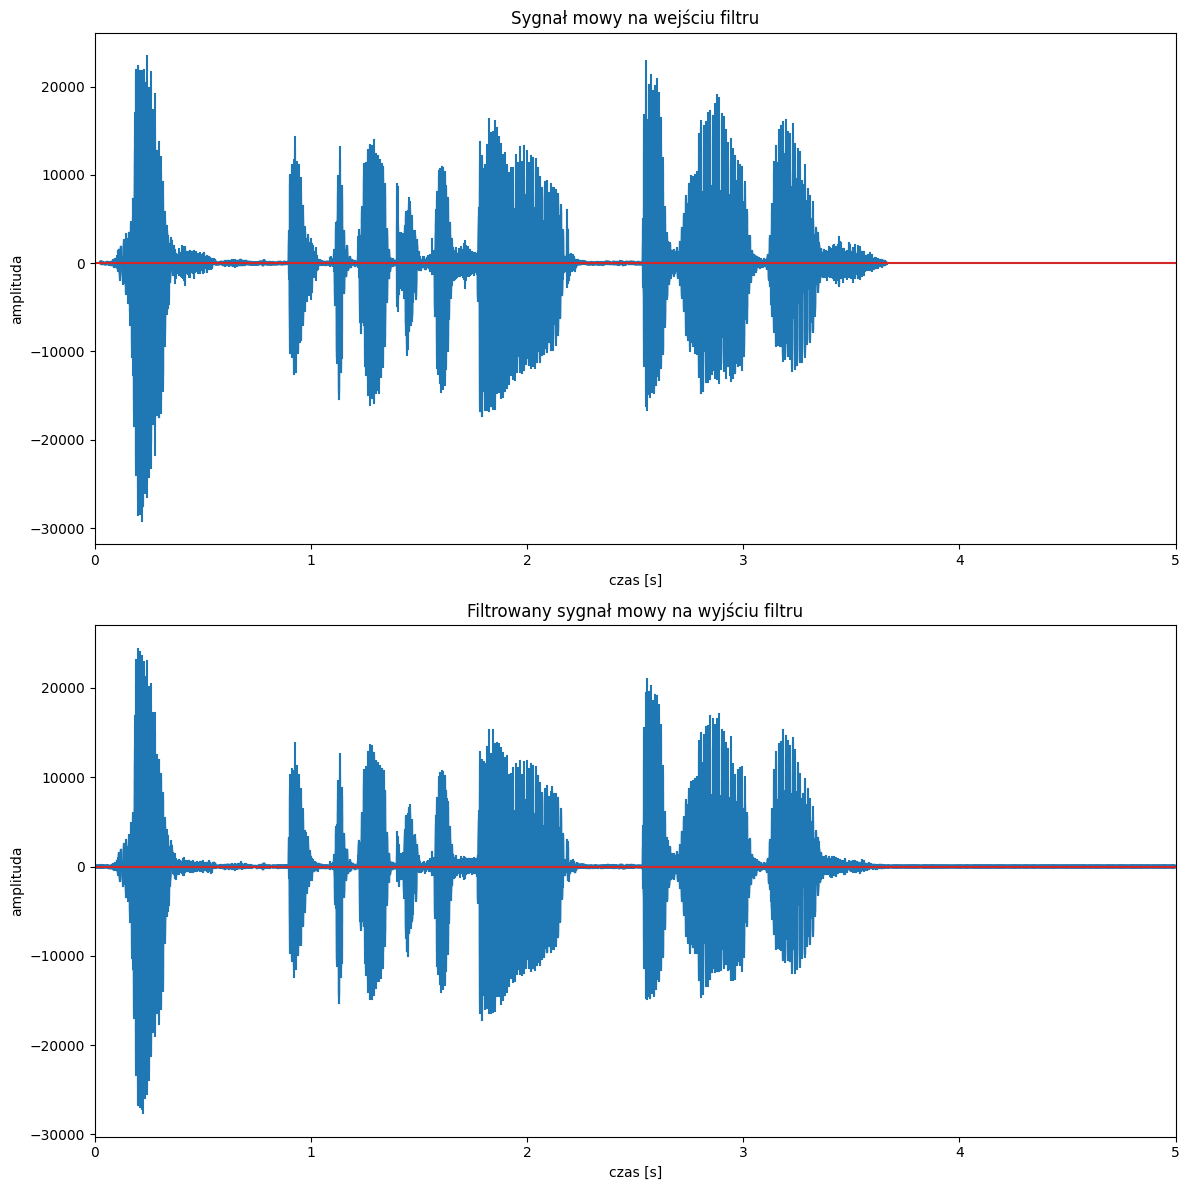

In [ ]:
#6.5
#a)

liczba_pikseli = 100
figura, wykresy = plt.subplots(2)
figura.set_size_inches(12, 12)
figura.set_dpi(liczba_pikseli)

wykres = wykresy[0]
wykres.set_xlabel('czas [s]')
wykres.set_ylabel('amplituda')
wykres.set_title('Sygnał mowy na wejściu filtru')
wykres.set_xlim(0, dlugosc)
wykres.stem(t, mowa, markerfmt = ' ')

wykres = wykresy[1]
wykres.set_xlabel('czas [s]')
wykres.set_ylabel('amplituda')
wykres.set_title('Filtrowany sygnał mowy na wyjściu filtru')
wykres.set_xlim(0, dlugosc)

wykres.stem(t, mowa_filtrowana, markerfmt = ' ')
figura.set_tight_layout(tight = True)


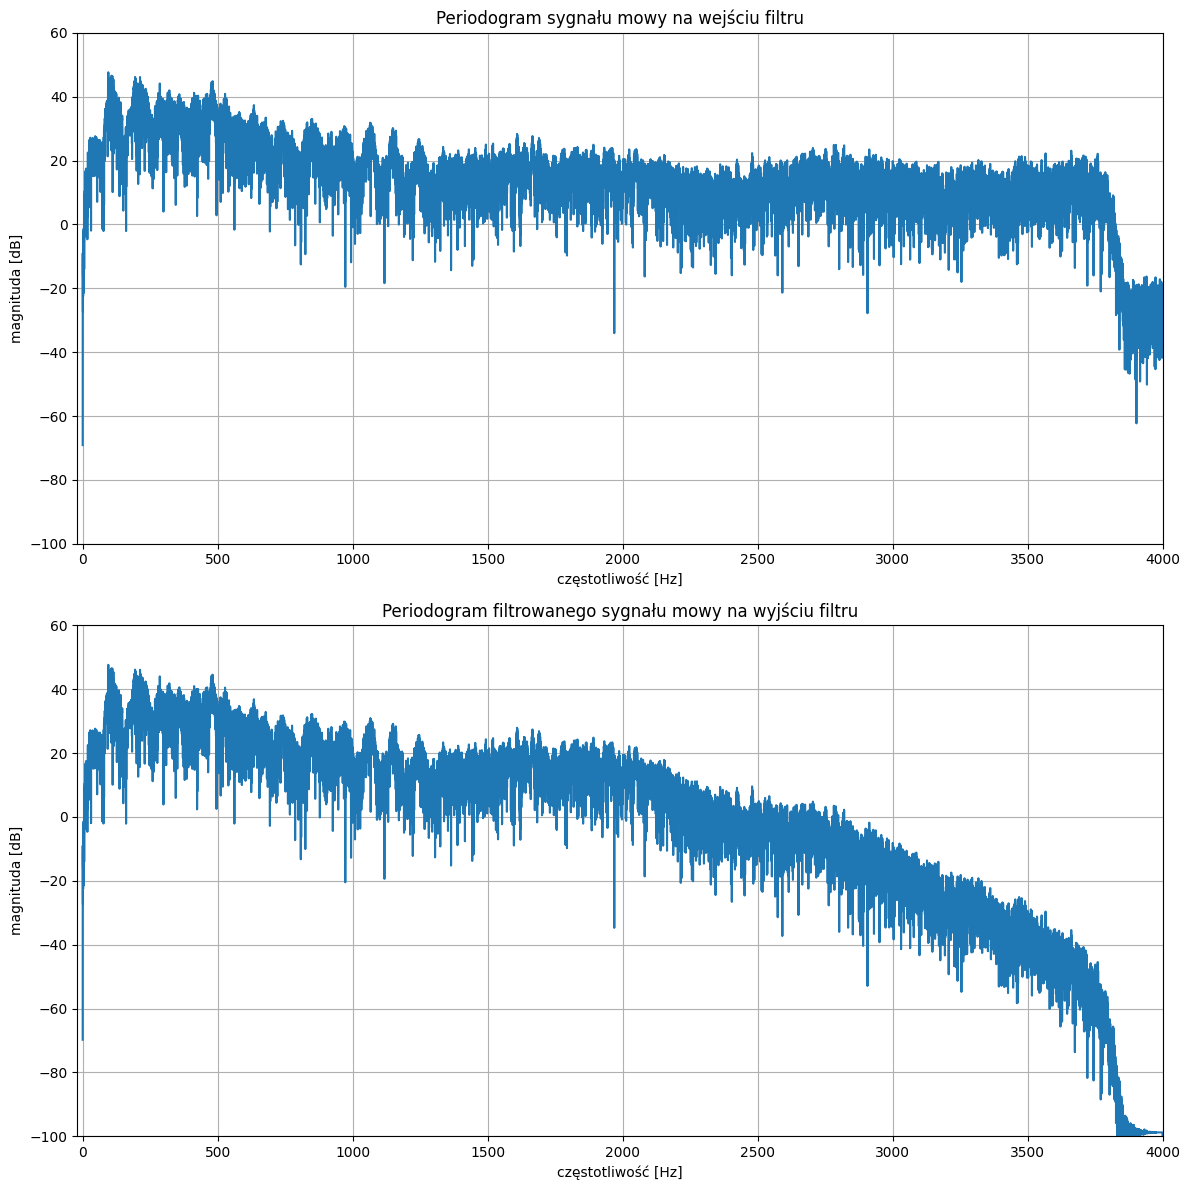

In [ ]:
#6.5
#b)
czestotliwosc_mowy, Periodogram_1_mowy = scipy.signal.periodogram(mowa, fs = fs_mowy, detrend = False, scaling = 'spectrum')
czestotliwosc_mowy_filtrowanej, Periodogram_1_mowy_filtrowanej = scipy.signal.periodogram(mowa_filtrowana, fs = fs_mowy, detrend = False, scaling = 'spectrum')

figura, wykresy = plt.subplots(2)
figura.set_size_inches(12, 12)
figura.set_dpi(liczba_pikseli)

wykres = wykresy[0]
wykres.set_xlabel('częstotliwość [Hz]')
wykres.set_ylabel('magnituda [dB]')
wykres.set_title('Periodogram sygnału mowy na wejściu filtru')
wykres.set_xlim(-20, fs / 2)
wykres.set_ylim(-100, 60)
wykres.grid()

wykres.plot(czestotliwosc_mowy, 20 * np.log10(np.sqrt(Periodogram_1_mowy)))

wykres = wykresy[1]
wykres.set_xlabel('częstotliwość [Hz]')
wykres.set_ylabel('magnituda [dB]')
wykres.set_title('Periodogram filtrowanego sygnału mowy na wyjściu filtru')
wykres.set_xlim(-20, fs / 2)
wykres.set_ylim(-100, 60)
wykres.grid()

wykres.plot(czestotliwosc_mowy_filtrowanej, 20 * np.log10(np.sqrt(Periodogram_1_mowy_filtrowanej)))
figura.set_tight_layout(tight = True)

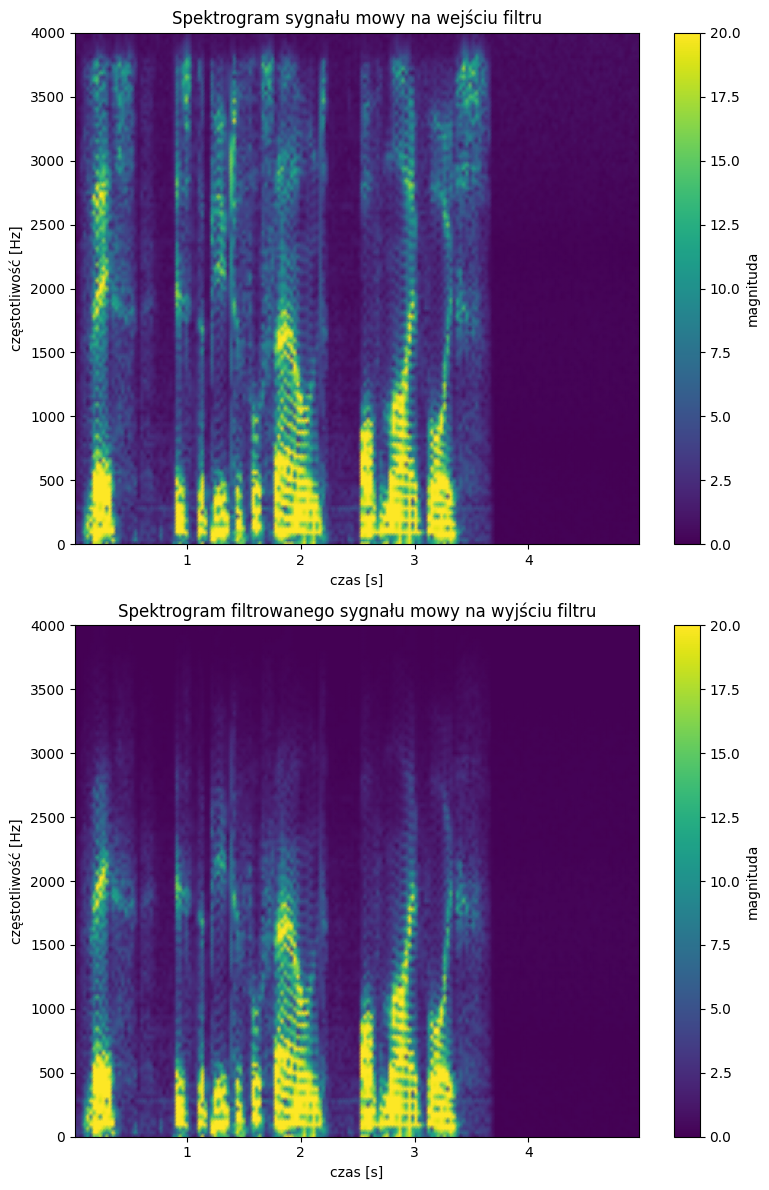

In [ ]:
#6.5
#c)
figura, wykresy = plt.subplots(2)
figura.set_size_inches(8, 12)
figura.set_dpi(liczba_pikseli)

f, t, Spektogram_1 = scipy.signal.spectrogram(mowa, fs = fs_mowy, scaling = 'spectrum', mode = 'magnitude')

wykres = wykresy[0]
wykres.set_xlabel('czas [s]')
wykres.set_ylabel('częstotliwość [Hz]')
wykres.set_title('Spektrogram sygnału mowy na wejściu filtru')

siatka = wykres.pcolormesh(t, f, np.sqrt(Spektogram_1), shading = 'gouraud', vmin = 0, vmax = 20)

pasek_koloru = figura.colorbar(siatka, ax = wykres, orientation = 'vertical')
pasek_koloru.set_label('magnituda')

f, t, Spektogram_1 = scipy.signal.spectrogram(mowa_filtrowana, fs = fs_mowy, scaling = 'spectrum', mode = 'magnitude')

wykres = wykresy[1]
wykres.set_xlabel('czas [s]')
wykres.set_ylabel('częstotliwość [Hz]')
wykres.set_title('Spektrogram filtrowanego sygnału mowy na wyjściu filtru')

siatka = wykres.pcolormesh(t, f, np.sqrt(Spektogram_1), shading = 'gouraud', vmin = 0, vmax = 20)
pasek_koloru = figura.colorbar(siatka, ax = wykres, orientation = 'vertical')
pasek_koloru.set_label('magnituda')

figura.set_tight_layout(tight = True)
